### Implementing the basic K-Means algorithm using sk-learn from generated data
K-means is a prototype-based clustering method that utilizes centroid (average) of similar points

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

Generating random dataset using make_blobs function in sk-learn. The datasets are created using the Guassian function. Will setting n_features to 2 so result will be of dimension 2

In [43]:
x, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.8, shuffle=True, random_state=0) ## random_state=0 forces number generation to be int

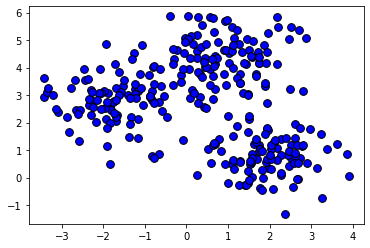

In [44]:
plt.scatter(x[:, 0], x[:, 1], c='blue', marker='o', edgecolor='black', s=60 )

Clusters are optimized using the Squared Sum of Errors (SSE) which is also called cluster inertia. The value is what gets optimized to create optimal clusters

In [46]:
## Inital clustering without optimal clusters (no elbow method)
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, verbose=1)
kmeans.fit(x)

Initialization complete
Iteration 0, inertia 1013.5830008836595
Iteration 1, inertia 820.5300894743826
Iteration 2, inertia 819.5912353160973
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1452.262157503799
Iteration 1, inertia 836.2538833615347
Iteration 2, inertia 819.9772213442335
Iteration 3, inertia 819.5912353160973
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 1289.839792323529
Iteration 1, inertia 821.5801002917394
Iteration 2, inertia 819.5912353160973
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1689.3895177362524
Iteration 1, inertia 825.2482674594149
Iteration 2, inertia 819.7855489154872
Iteration 3, inertia 819.5912353160973
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 1590.4547762989123
Iteration 1, inertia 924.6758366253807
Iteration 2, inertia 823.4832552552091
Iteration 3, inertia 819.78554

KMeans(n_clusters=2, verbose=1)

In [51]:
result = kmeans.predict(x)
result

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], d

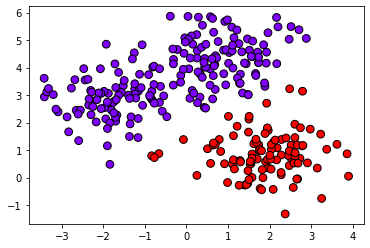

In [52]:
plt.scatter(x[:, 0], x[:, 1], c=result, marker='o', edgecolor='black', s=60, cmap='rainbow')


Implementing the Elbow method to determin the best number of clusters to group data


In [62]:
inertia = []
for i in range(1,10): ##Need range to go from 1-10 and not 0-10. 
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, verbose=0)
    result = kmeans.fit(x)
    print(result.inertia_)
    inertia.append(result.inertia_)

1697.0322766881577
819.5912353160973
367.64919197862594
310.27010148296927
268.4419496682897
230.07406166457383
200.75553374040632
172.21506237201666
154.61870834871533


Plotting the inertia (SSE) for each cluster results in the following scatter plot. The "elbow" occurs at 3 clusters and this should be selected 
as the optimal number of clusters

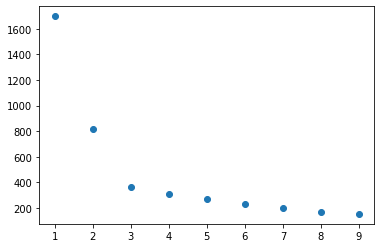

In [63]:
clusters = range(1,10)
plt.scatter(clusters, inertia)

Plotting generated data with the proper number of clusters

In [69]:
kmeans = KMeans(n_clusters=3, init='k-means++', verbose=0, n_init=10, max_iter=300)
kmeans.fit(x)
result = kmeans.predict(x)

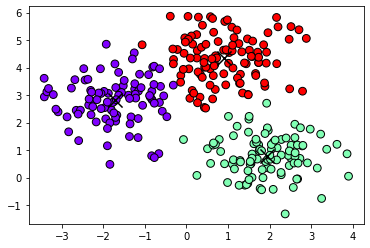

In [75]:
plt.scatter(x[:, 0], x[:, 1], c=result, marker='o', edgecolor='black', s=60, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=200, c='black')

From the elbow method the optimal number of clusters is determined to be 3 which matches up with the number of centers specified by make_blobs. The centers of the clusters are highlighed with 'black x's'